<a href="https://colab.research.google.com/github/VMBoehm/SDSS_PAE/blob/main/LSTM_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting the Density Estimator

In [2]:
import numpy as np

In [3]:
label           = 'galaxies_bins1000_wl3388-8318'
label_          = label+'_minz005_maxz036_minSN50'
label_2         = label_+'_10_fully_connected'

In [4]:
encoded_train, encoded_valid = np.load('/global/cscratch1/sd/vboehm/Datasets/encoded/1//encoded_%s.npy'%label_2, allow_pickle=True)

In [6]:
res_fluxes, res_masks, res_inv_vars = np.load('prepped_data_spectra_%s.npy'%label_,allow_pickle=True)

redshifts, SNs, ras, decs, sublabel = np.load('prepped_data_prop_%s.npy'%label_,allow_pickle=True)

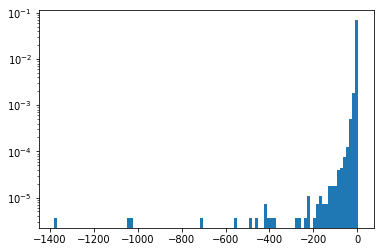

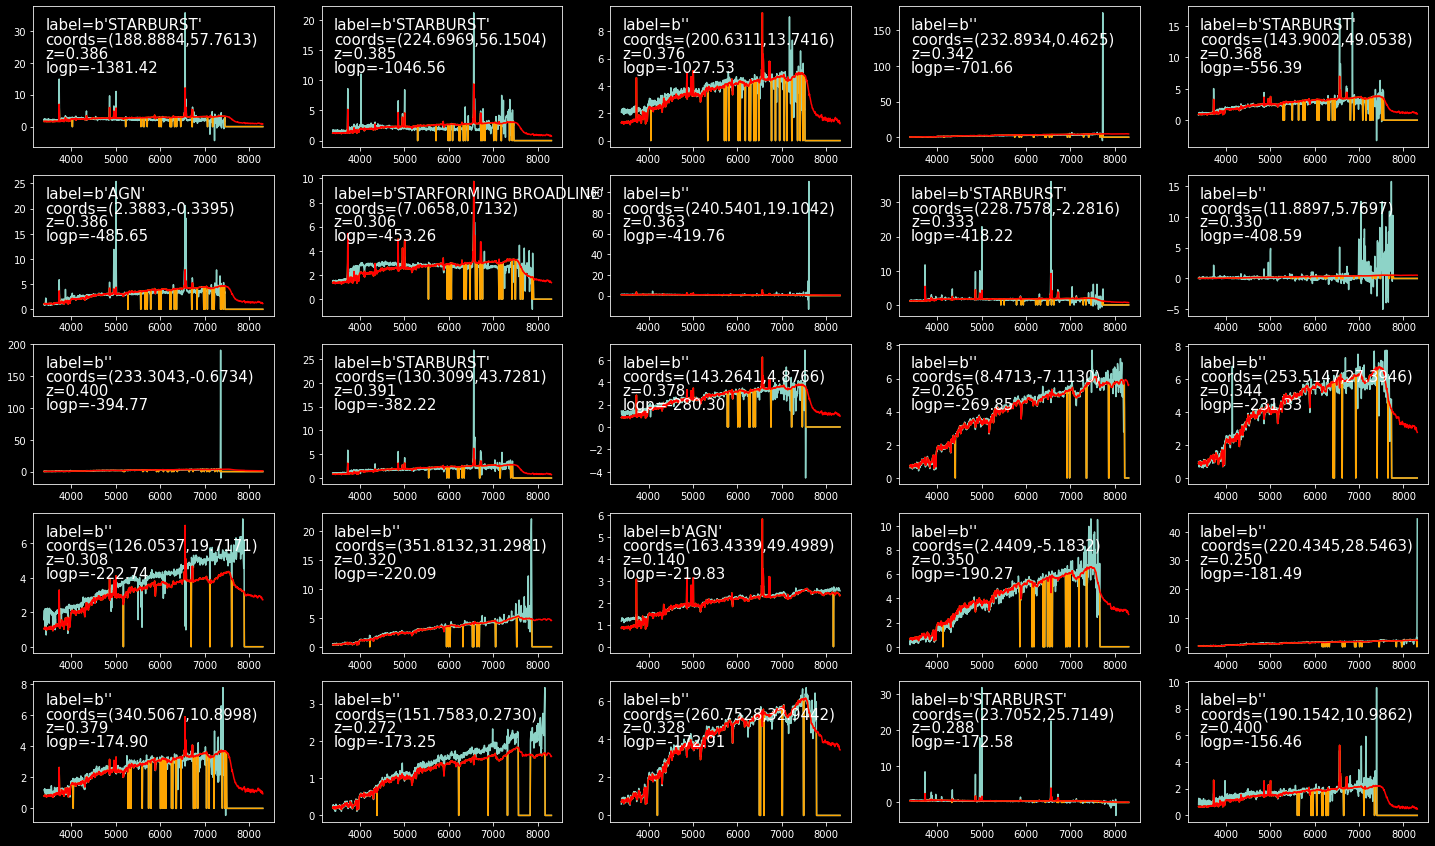

In [183]:
logps_valid = kde.score_samples(encoded_valid)
_ = plt.hist(logps_valid, bins=100, density=True, log=True, cumulative=False)
plt.show()
indices = np.argsort(logps_valid)

style_list=['dark_background']
# Plot a demonstration figure for every available style sheet.
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            
            fig, ax = plt.subplots(5,5, figsize=(25,15))
            ax = ax.flatten()
            for nn, ii in enumerate(indices[0:25]):
                ax[nn].plot(new_wl[:-1], np.squeeze(valid_data)[ii]*np.squeeze(valid_mask)[ii], )
                ax[nn].plot(new_wl[:-1], np.squeeze(decoded_valid)[ii]*np.squeeze(valid_mask)[ii], color='orange')
                ax[nn].plot(new_wl[:-1], np.squeeze(decoded_valid)[ii], color='red')
                ax[nn].text(0.05, 0.92, r'label=%s'%valid_labels[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.82, r'coords=(%.4f,%.4f)'%(valid_ras[ii],valid_decs[ii]), fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.72, r'z=%.3f'%valid_params[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.62, r'logp=%.2f'%logps_valid[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)

plt.show()

In [ ]:
# cluster by recon error

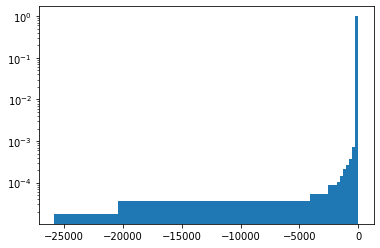

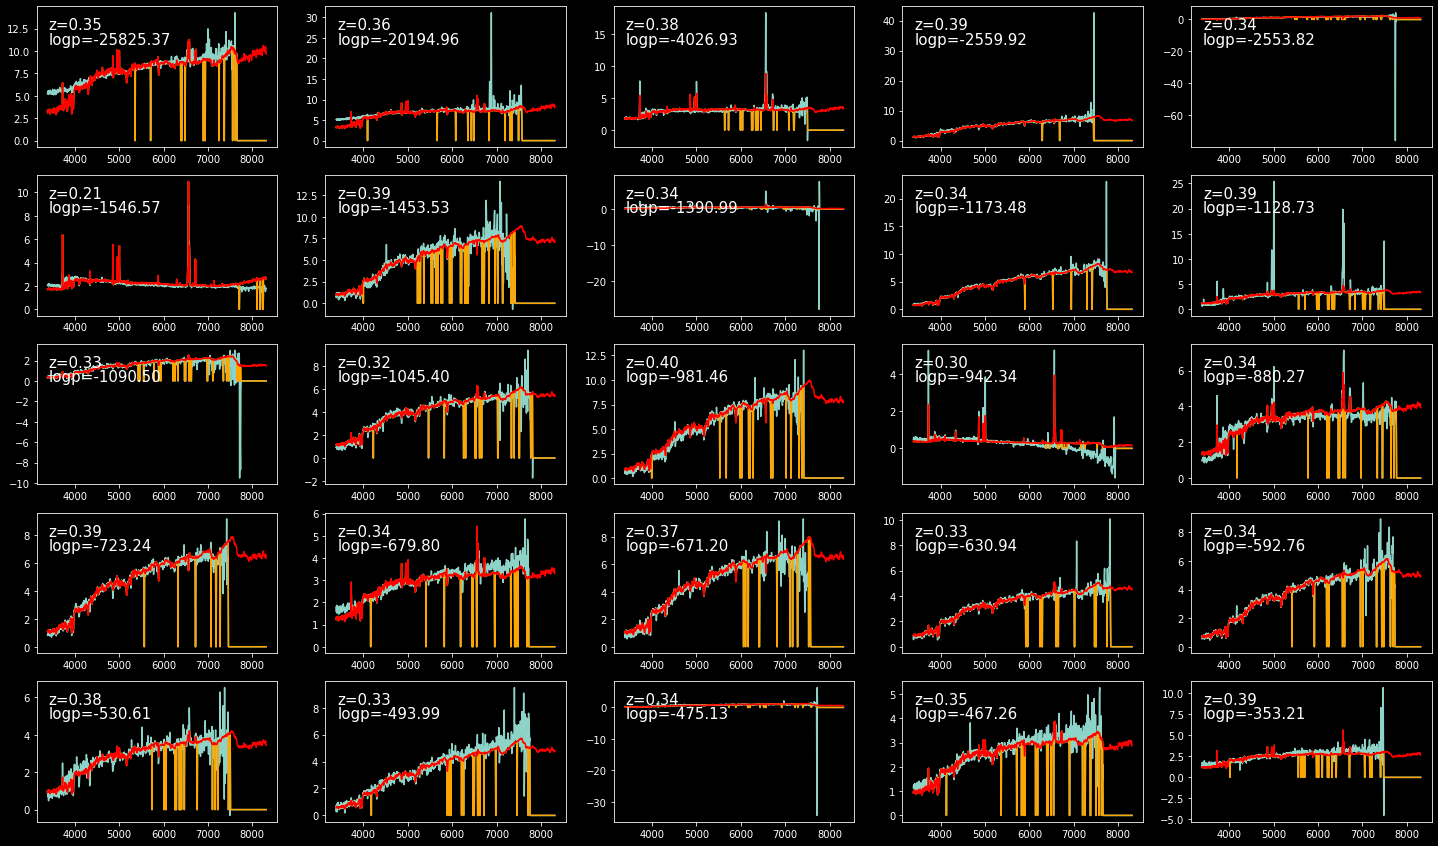

In [116]:
logps_train = kde.score_samples(encoded_train)
_ = plt.hist(logps_train, bins=100, density=True, log=True, cumulative=True)
plt.show()
indices = np.argsort(logps_train)

style_list=['dark_background']
# Plot a demonstration figure for every available style sheet.
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            
            fig, ax = plt.subplots(5,5, figsize=(25,15))
            ax = ax.flatten()
            for nn, ii in enumerate(indices[0:25]):
                ax[nn].plot(new_wl[:-1], np.squeeze(train_data)[ii]*np.squeeze(train_mask)[ii], )
                ax[nn].plot(new_wl[:-1], np.squeeze(decoded_train)[ii]*np.squeeze(train_mask)[ii], color='orange')
                ax[nn].plot(new_wl[:-1], np.squeeze(decoded_train)[ii], color='red')
                ax[nn].text(0.05, 0.92, r'z=%.2f'%train_params[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.82, r'logp=%.2f'%logps_train[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)

plt.show()